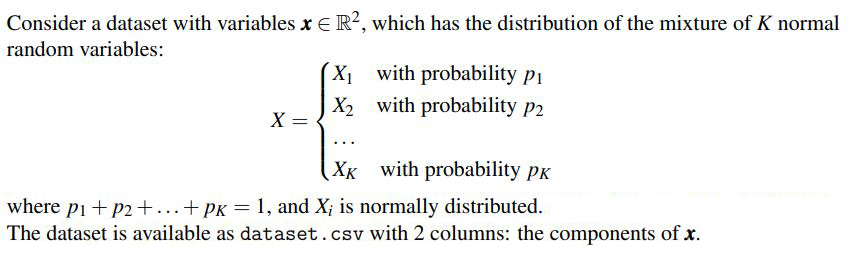

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
import seaborn as sns

Load the data

In [24]:
import pandas as pd
df = pd.read_csv('dataset.csv', header=0)

Check the data

In [25]:
print(df.head())
print(df.dtypes)
print(f"Shape of data: {df.shape}")

         x0        x1
0  5.908849  0.000030
1  4.260432  0.000133
2  7.784966  0.000095
3  7.718576  0.000094
4  1.159971  0.000159
x0    float64
x1    float64
dtype: object
Shape of data: (17500, 2)


Observe Range & Preprocess

In [32]:
x = df.values
print("Min:", x.min(axis=0))
print("Max:", x.max(axis=0))

# Normalize using StandardScaler
scaler = StandardScaler()
x_norm = pd.DataFrame(scaler.fit_transform(x), columns=[0, 1])

Min: [-2.21122549e+00 -3.09785632e-05]
Max: [1.50920296e+01 1.96170983e-04]


Scatter Plot & Determine K

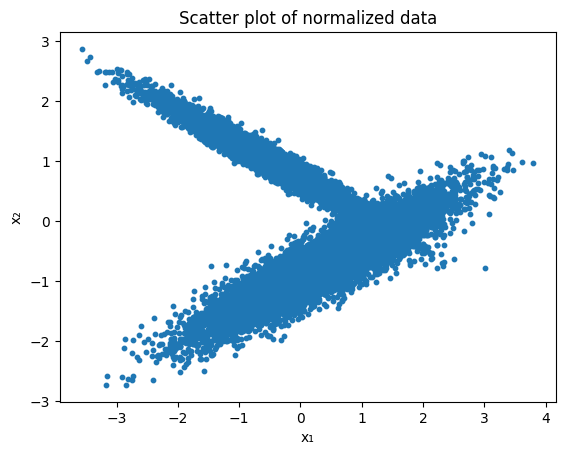

In [34]:
plt.scatter(x_norm.iloc[:, 0], x_norm.iloc[:, 1], s=10)
plt.title("Scatter plot of normalized data")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

Determine Best K with BIC

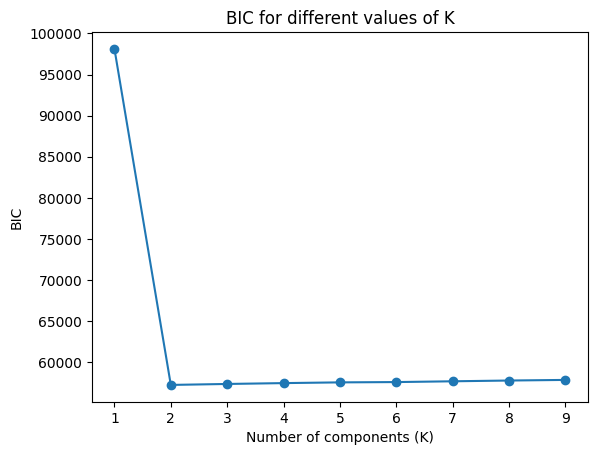

In [35]:
bic = []
n_components = range(1, 10)
for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(x_norm)
    bic.append(gmm.bic(x_norm))

plt.plot(n_components, bic, marker='o')
plt.title("BIC for different values of K")
plt.xlabel("Number of components (K)")
plt.ylabel("BIC")
plt.show()

Fit GMM

In [36]:
K = 2  # Based on BIC or visual inspection
gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=0)
gmm.fit(x_norm)

# Get responsibilities and cluster labels
responsibilities = gmm.predict_proba(x_norm)
labels = gmm.predict(x_norm)

# Convert means back to original space
centers_orig = pd.DataFrame(scaler.inverse_transform(gmm.means_), columns=[0, 1])


Plot: Color by P(x ∈ X₁)

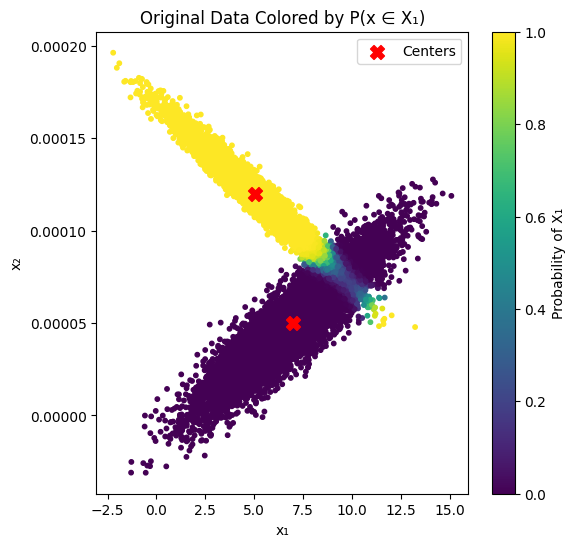

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=responsibilities[:, 0], cmap='viridis', s=10)
plt.scatter(centers_orig[0], centers_orig[1], c='red', s=100, marker='X', label='Centers')
plt.title("Original Data Colored by P(x ∈ X₁)")
plt.colorbar(label="Probability of X₁")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.show()

Plot Cluster Assignments

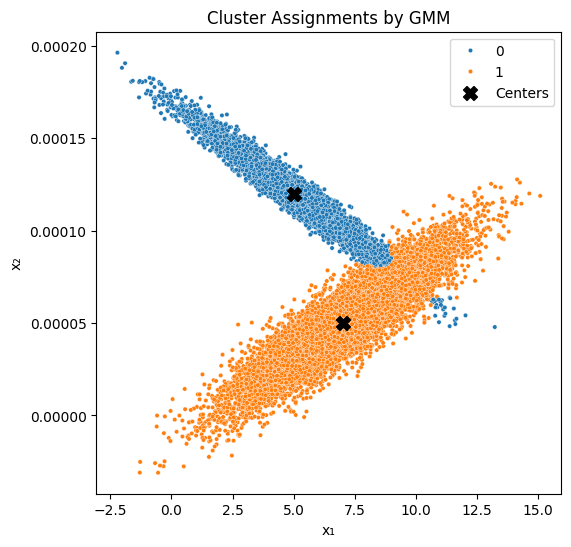

In [46]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette='tab10', s=10)
plt.scatter(centers_orig[0], centers_orig[1], c='black', marker='X', s=100, label='Centers')
plt.title("Cluster Assignments by GMM")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.show()